## Data Understanding

In [1]:
import pandas as pd

# load data
df = pd.read_csv('Movie_Review_Sentiment.csv')

In [2]:
# show first 10 rows
df.head(10)

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0
5,I would put this at the top of my list of film...,0
6,Whoever wrote the screenplay for this movie ob...,0
7,"When I first saw a glimpse of this movie, I qu...",0
8,"Who are these ""They""- the actors? the filmmake...",0
9,This is said to be a personal film for Peter B...,0


In [3]:
# show last 10 rows
df.tail(10)

,text,label
24990,Like I said its a hidden surprise. It well wri...,1
24991,I'd always wanted David Duchovney to go into t...,1
24992,This movie really kicked some ass. I watched i...,1
24993,With the mixed reviews this got I wasn't expec...,1
24994,"Very smart, sometimes shocking, I just love it...",1
24995,A hit at the time but now better categorised a...,1
24996,I love this movie like no other. Another time ...,1
24997,This film and it's sequel Barry Mckenzie holds...,1
24998,'The Adventures Of Barry McKenzie' started lif...,1
24999,The story centers around Barry McKenzie who mu...,1


In [4]:
# show data dimensions
df.shape

(25000, 2)

In [5]:
# show data types
df.dtypes

text     object
label     int64
dtype: object

In [6]:
# show overall info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [7]:
# unique values of target variable (sentiment label)
df.label.unique()

array([0, 1], dtype=int64)

In [8]:
# check value counts of 2 classes
df['label'].value_counts()

0    12500
1    12500
Name: label, dtype: int64

In [9]:
# check missing values
df.isnull().sum()

text     0
label    0
dtype: int64

In [10]:
# check duplicates
df.duplicated().sum()

96

In [11]:
# review duplicated
duplicated_rows = df[df.duplicated()]

# Print the full text of the duplicated rows
print(duplicated_rows.to_string())

In [13]:
# review one of the duplicate row
df[df['text'] == "I saw this in the summer of 1990. I'm still annoyed by how bad this movie is in 2001.<br /><br />Implausible plot. You'd have to be a child to think this could happen.<br /><br />I'm just really annoyed by it. Don't see this."]

,text,label
6351,I saw this in the summer of 1990. I'm still an...,0
6353,I saw this in the summer of 1990. I'm still an...,0


## Data Cleaning

In [14]:
# drop missing values although detected 0 missing values (double check)
df = df.dropna()
df.isnull().sum()

text     0
label    0
dtype: int64

In [15]:
# drop duplicated although detected 0 duplicate (double check)
df = df.drop_duplicates()
df.duplicated().sum()

0

## Text Cleaning (Text Column)

In [16]:
import pandas as pd
import re
import contractions
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ChokJoe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ChokJoe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
# lowercase text 
def lowercase_text(text):
    return text.lower()

# change apostrophe 
def replace_apostrophe(text):
    return text.replace("’", "'")

df['text'] = df['text'].apply(lowercase_text)
df['text'] = df['text'].apply(replace_apostrophe)
df.head(10)

,text,label
0,i rented i am curious-yellow from my video sto...,0
1,"""i am curious: yellow"" is a risible and preten...",0
2,if only to avoid making this type of film in t...,0
3,this film was probably inspired by godard's ma...,0
4,"oh, brother...after hearing about this ridicul...",0
5,i would put this at the top of my list of film...,0
6,whoever wrote the screenplay for this movie ob...,0
7,"when i first saw a glimpse of this movie, i qu...",0
8,"who are these ""they""- the actors? the filmmake...",0
9,this is said to be a personal film for peter b...,0


In [18]:
import pandas as pd
import wordninja
import re

# Word Segmentation on text column
df['text'] = df['text'].apply(lambda x: ' '.join(wordninja.split(x)))
df.head(10)

,text,label
0,i rented i am curious yellow from my video sto...,0
1,i am curious yellow is a risible and pretentio...,0
2,if only to avoid making this type of film in t...,0
3,this film was probably inspired by god ard's m...,0
4,oh brother after hearing about this ridiculous...,0
5,i would put this at the top of my list of film...,0
6,whoever wrote the screenplay for this movie ob...,0
7,when i first saw a glimpse of this movie i qui...,0
8,who are these they the actors the filmmakers c...,0
9,this is said to be a personal film for peter b...,0


In [19]:
# expand the words like cnnt to cannot / ve to have and so on
def expand_contractions(text):

    expanded_text = contractions.fix(text)
    return expanded_text

df['text'] = df['text'].apply(expand_contractions)
df.head(10)

,text,label
0,i rented i am curious yellow from my video sto...,0
1,i am curious yellow is a risible and pretentio...,0
2,if only to avoid making this type of film in t...,0
3,this film was probably inspired by god ard's m...,0
4,oh brother after hearing about this ridiculous...,0
5,i would put this at the top of my list of film...,0
6,whoever wrote the screenplay for this movie ob...,0
7,when i first saw a glimpse of this movie i qui...,0
8,who are these they the actors the filmmakers c...,0
9,this is said to be a personal film for peter b...,0


In [20]:
import emoji
import re
from emoticons_lib import emoticons_lib

# convert emoticon with text   { :), :( }
def convert_emojis_with_text(text):
    emoticon_pattern = re.compile('|'.join(re.escape(emoticon) for emoticon in emoticons_lib.keys()))
    return emoticon_pattern.sub(lambda match: emoticons_lib[match.group(0)],text)

df['text'] = df['text'].apply(lambda e: convert_emojis_with_text(e))


# convert emojis to text
df['text'] = df['text'].apply(lambda e: emoji.demojize(e, language="e"))

# replace underscore with whitespace (caused by emojis text like 😊 convert to :smiling_smiling_face ）
df['text'] = df['text'].apply(lambda e: e.replace('_', ' '))

# remove semicolon with whitespace (caused by emojis text)
df['text'] = df['text'].apply(lambda e: e.replace(':', ' '))


In [21]:
# remove words =  or > 2 characters
def remove_short_words(text):
    return ' '.join([word for word in text.split() if len(word) > 2])

# remove symbols
def remove_symbols(text):
    symbol_pattern = re.compile(r'[\(\)\[\]:]')
    return symbol_pattern.sub('', text)

# remove symbols and digits
def remove_symbols_digits(text):
    return re.sub('[^a-zA-Z\s]', ' ', text)

# remove URLs
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

# remove HTML tags
def remove_html_tags(text):
    return re.sub(r'<[^>]+>', '', text)

# remove extra whitespace
def remove_whitespace(text):
    return ' '.join(text.split())

# remove punctuation
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return ' '.join([token for token in text.split() if token.lower() not in stop_words])

# lemmatizing text
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(token) for token in text.split()])

# Apply preprocessing techniques sequentially
df['text'] = df['text'].apply(remove_short_words)
df['text'] = df['text'].apply(remove_symbols)
df['text'] = df['text'].apply(remove_symbols_digits)
df['text'] = df['text'].apply(remove_urls)
df['text'] = df['text'].apply(remove_html_tags)
df['text'] = df['text'].apply(remove_whitespace)
df['text'] = df['text'].apply(remove_punctuation)
df['text'] = df['text'].apply(remove_stopwords)
df['text'] = df['text'].apply(lemmatize_text)


In [22]:
df.head(10)

,text,label
0,rented curious yellow video store controversy ...,0
1,curious yellow risible pretentious steaming pi...,0
2,avoid making type film future film interesting...,0
3,film probably inspired god ard masculin minin ...,0
4,brother hearing ridiculous film umpteen year t...,0
5,would put top list film category watch able tr...,0
6,whoever wrote screenplay movie obviously never...,0
7,first saw glimpse movie quickly noticed actres...,0
8,actor filmmaker certainly could audience among...,0
9,said personal film peter bogd avit based life ...,0


## Tokenize 

In [23]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# tokenize text
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Apply tokenization to the text column in the DataFrame
df['text'] = df['text'].apply(tokenize_text)

df.head(10)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ChokJoe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,label
0,"[rented, curious, yellow, video, store, contro...",0
1,"[curious, yellow, risible, pretentious, steami...",0
2,"[avoid, making, type, film, future, film, inte...",0
3,"[film, probably, inspired, god, ard, masculin,...",0
4,"[brother, hearing, ridiculous, film, umpteen, ...",0
5,"[would, put, top, list, film, category, watch,...",0
6,"[whoever, wrote, screenplay, movie, obviously,...",0
7,"[first, saw, glimpse, movie, quickly, noticed,...",0
8,"[actor, filmmaker, certainly, could, audience,...",0
9,"[said, personal, film, peter, bogd, avit, base...",0


In [24]:
nltk.download('words')
from nltk.corpus import words
import nltk

# Remove any non-English words
english_words = set(words.words()) 
def remove_non_english(tokens):
    english_tokens = []
    for word in tokens:
        if word in english_words:
            english_tokens.append(word)
        else:
            english_tokens.append('')
    return [token for token in english_tokens if token != '']
df['text'] = df['text'].apply(remove_non_english)

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ChokJoe\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [25]:
# join the tokens data back to detoken then check duplicated as tokens data is list cant check duplicated 
df['text'] = df['text'].apply(lambda tokens: ' '.join(tokens))
df.duplicated().sum()

7

In [26]:
# review duplicated
duplicated_rows = df[df.duplicated()]

# Print the full text of the duplicated rows
print(duplicated_rows.to_string())

In [27]:
# review one of the duplicate row
df[df['text'] == 'iris much acting good story unique interesting arrangement absence violence sex refreshing character convincing felt like could understand feeling enjoyable movie']

,text,label
12615,iris much acting good story unique interesting...,1
12616,iris much acting good story unique interesting...,1


In [28]:
#drop duplicates
df = df.drop_duplicates()

In [29]:
# doublecheck missing values as after text cleaning might have blank data
df.isnull().sum()

text     0
label    0
dtype: int64

In [30]:
#check empty string
df[df['text'] == '']

,text,label


In [31]:
#filter empty string
df = df[df['text'] != '']
df.shape

(24897, 2)

In [32]:
#last check without token data
df.isnull().sum()

text     0
label    0
dtype: int64

In [33]:
#last check without token data
df.duplicated().sum()

0

In [34]:
# # Apply tokenization to the text column in the DataFrame (FOR EDA USED)
df['text'] = df['text'].apply(tokenize_text)
df.head(10)

,text,label
0,"[rented, curious, yellow, video, store, contro...",0
1,"[curious, yellow, risible, pretentious, steami...",0
2,"[avoid, making, type, film, future, film, inte...",0
3,"[film, probably, inspired, god, urge, see, fil...",0
4,"[brother, hearing, ridiculous, film, umpteen, ...",0
5,"[would, put, top, list, film, category, watch,...",0
6,"[whoever, wrote, screenplay, movie, obviously,...",0
7,"[first, saw, glimpse, movie, quickly, actress,...",0
8,"[actor, certainly, could, audience, among, air...",0
9,"[said, personal, film, peter, based, life, thi...",0


## EDA

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

## Word Length Histogram

In [36]:
# find the highest number of token in a row
max = 0
for row in df['text']:
  if (len(row) > max):
    max = len(row)

<Axes: >

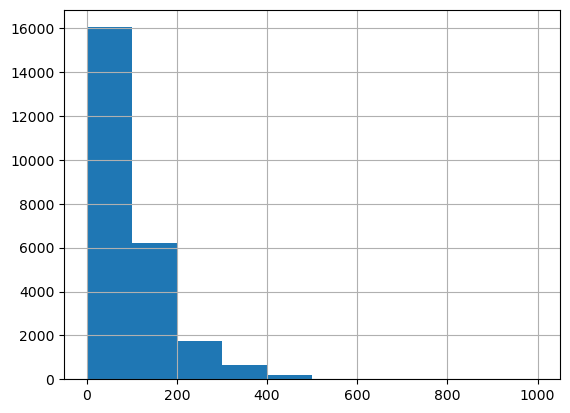

In [37]:
df['text'].map(lambda x: len(x)).hist(bins=range(0, max, 100))

<Axes: >

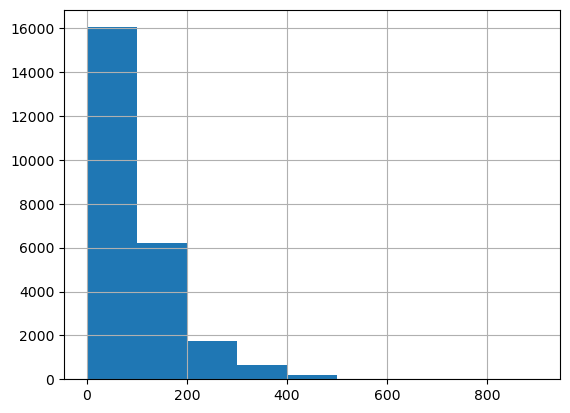

In [38]:
df['text'].map(lambda x: len(x)).hist(bins=range(0, 1000, 100))

## Visualization Positive (1) and Negative (0) Sentiment of Movie Review 

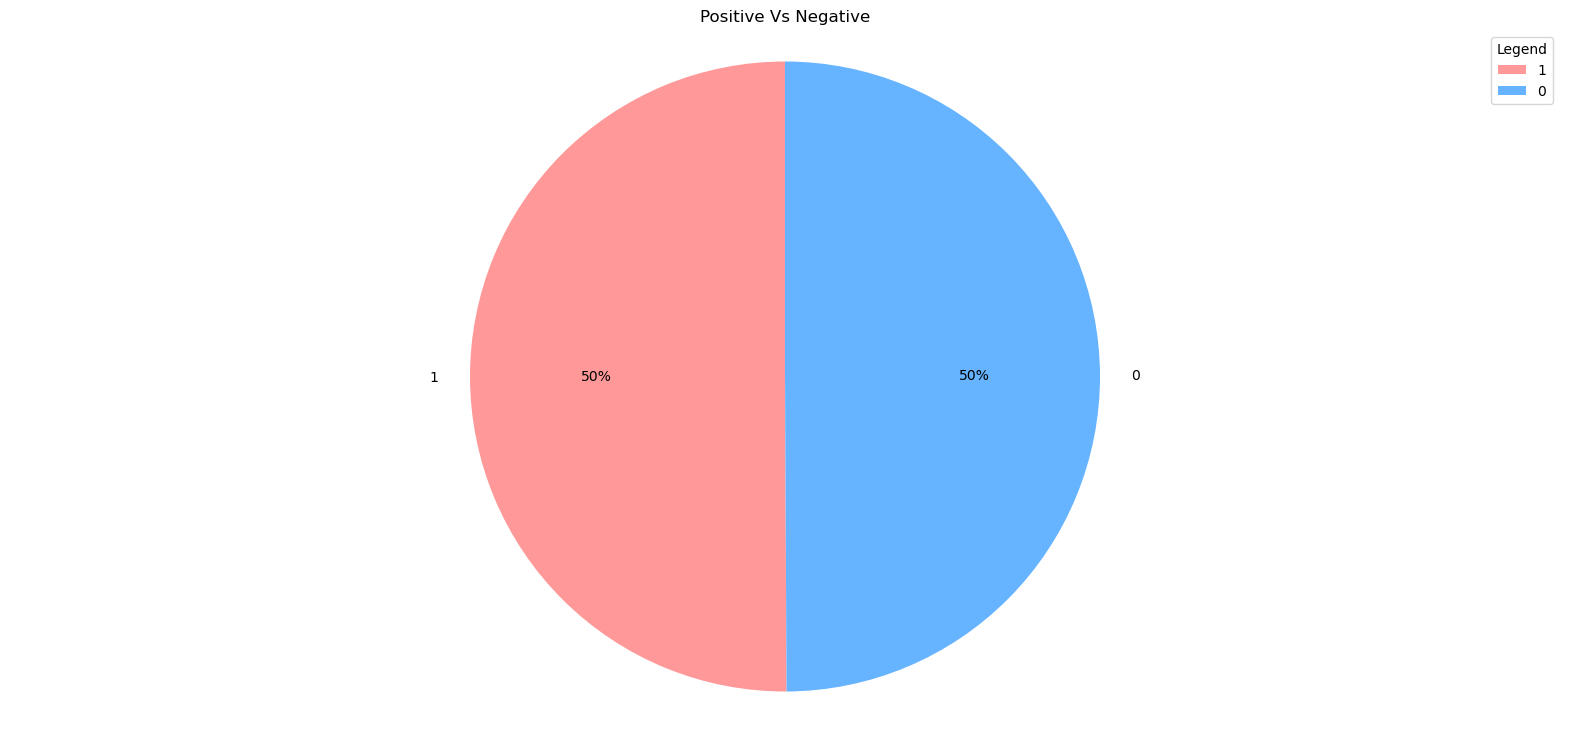

In [40]:
# Assuming df_filtered['label'] contains 'positive' and 'negative' labels
dfClass = df['label'].value_counts()

plt.figure(figsize=(20, 9))
plt.pie(dfClass, labels=dfClass.index, autopct='%.0f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Positive Vs Negative')
plt.legend(dfClass.index, title='Legend', loc='upper right')
plt.axis('equal')  
plt.show()

## Word Freqency

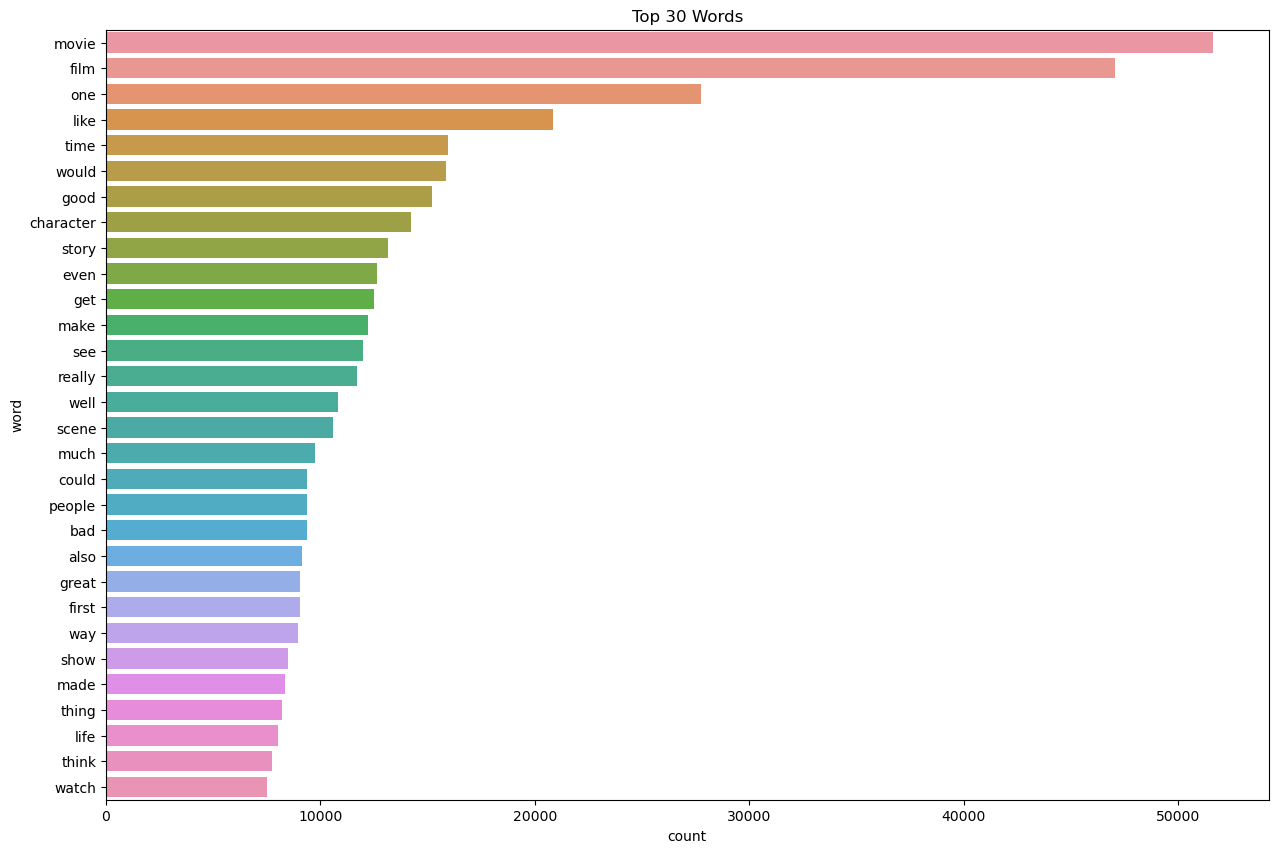

In [41]:
from nltk.probability import FreqDist
# Tokenize using NLTK
corpus = [text for text in df['text']]

# Flatten the list of tokens
corpus_flat = [word for sublist in corpus for word in sublist]

# Compute word frequencies using NLTK's FreqDist
word_freq = FreqDist(corpus_flat)

# Convert FreqDist to DataFrame
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['word', 'count']).sort_values(by='count', ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(x='count',y='word',data=word_freq_df.head(30))
plt.title('Top 30 Words')
plt.show()

## Word cloud


In [42]:
# join the tokens data back to detoken then check duplicated as tokens data is list cant check duplicated
# This is neccessary to create a corpus for word cloud
df_string = df.copy()
df_string['text'] = df_string['text'].apply(lambda tokens: ' '.join(tokens))

In [43]:
from wordcloud import WordCloud

### Overall

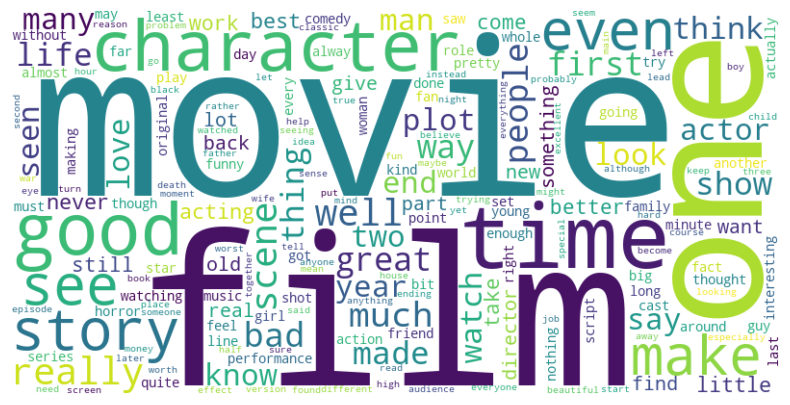

In [44]:
text = ' '.join(df_string['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white',collocations=False).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Positive Movie Review Sentiment

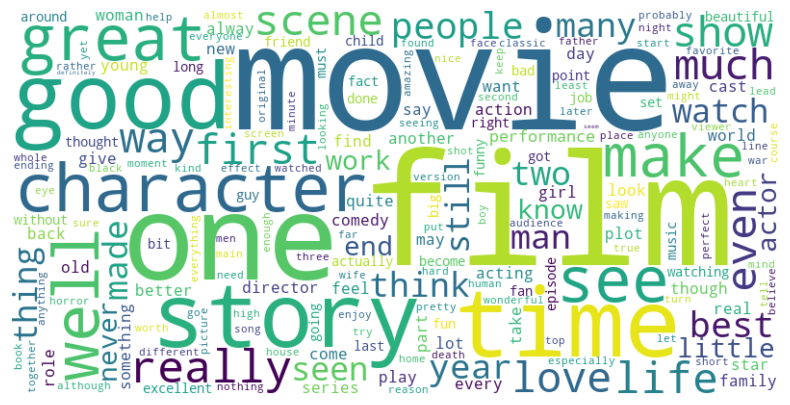

In [45]:
text = ' '.join(df_string.loc[df_string['label'] == 1]['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white',collocations=False).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Negative Movie Review Sentiment

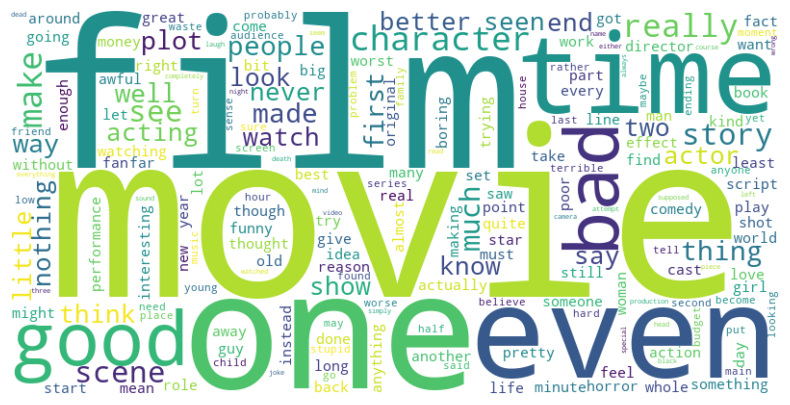

In [48]:
text = ' '.join(df_string.loc[df_string['label'] == 0]['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white',collocations=False).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## N-Gram Exploration

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

In [50]:
def _get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                    for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

### Bigram

<Axes: >

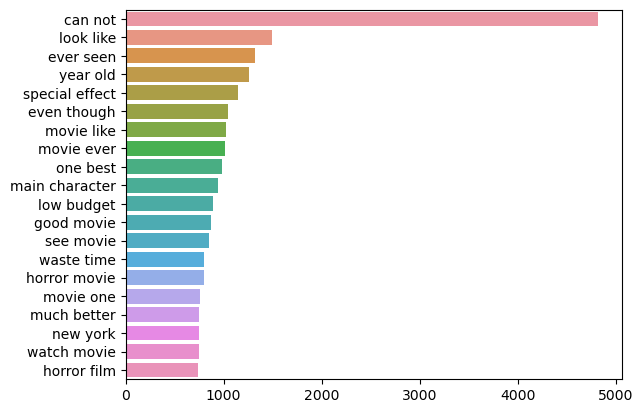

In [51]:
top_n_bigrams=_get_top_ngram(df_string['text'],2)
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

### Trigram

<Axes: >

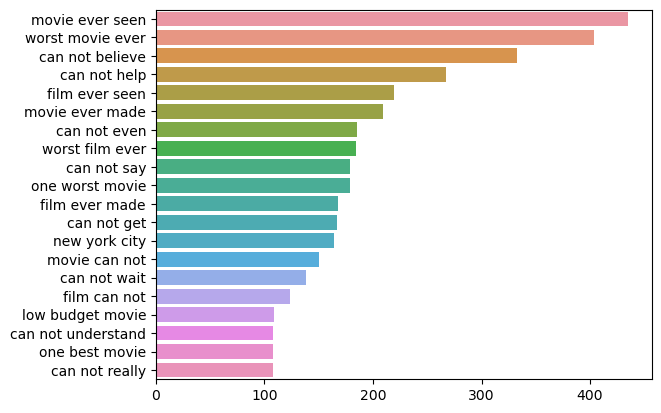

In [52]:
top_n_bigrams=_get_top_ngram(df_string['text'],3)
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

In [53]:
# save cleaned csv (WITH TOKENIZE)
df.to_csv("cleaned_Movie_Review_Sentiment_with_Token.csv", index=False)

In [54]:
# save cleaned csv (WITHOUT TOKENIZE)
df_string.to_csv("cleaned_Movie_Review_Sentiment_without_Token.csv", index=False)